In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datasets

/Users/amyguan/miniforge3/envs/weaver/lib/python3.11/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [17]:
MODEL_PARAMS = {
    "GRM": 8_000_000_000,
    "ArmorRM": 8_000_000_000,
    "URM": 8_000_000_000,
    "QRM": 8_000_000_000,
    "GPM": 8_000_000_000,
    "GRMLlama32": 3_000_000_000,
    "OffsetBias": 8_000_000_000,
    "GRMGemma": 2_000_000_000,
    "Skyworks": 8_000_000_000,
    "SkyworksGemma": 27_000_000_000,
    "QRMGemma": 27_000_000_000,
    "LDLRewardGemma": 27_000_000_000,
    "QwenPRM": 7_000_000_000,
    "Qwen72B": 72_000_000_000,
    "Qwen72BPRM": 72_000_000_000,
    "EurusPRMStage1": 7_000_000_000,
    "EurusPRMStage2": 7_000_000_000,
    "InternLM2RewardModel": 20_000_000_000,
    "InternLM2Reward7B": 7_000_000_000,
    "DecisionTreeReward8B": 8_000_000_000,
    "DecisionTreeReward27B": 27_000_000_000,
    "INFORM": 70_000_000_000,
    "DeepSeekLlama70B": 70_000_000_000,
    "DeepSeekQwen32B": 32_000_000_000,
    "SkyT1": 32_000_000_000,
    "Llama-3.3-70B-Instruct": 70_000_000_000,
    "Meta-Llama-3.1-405B-Instruct-quantized.w8a16": 405_000_000_000,
    "Qwen/Qwen2.5-72B-Instruct": 72_000_000_000,
    "QwQ-32B": 32_000_000_000,
    "WizardLM-2-8x22B": 176_000_000_000,
    "Mixtral-8x22B-Instruct-v0.1": 176_000_000_000,
    "DeepSeekLlama8B": 8_000_000_000,
    "DeepSeekQwen7B": 7_000_000_000,
    "Llama-3.1-8B-Instruct": 8_000_000_000,
    "Gemma-3-12B-Instruct": 12_000_000_000,
    "Gemma-3-4B-Instruct": 4_000_000_000,
    "Phi-4-4B-Instruct": 4_000_000_000,
    "Qwen-2.5-7B-Instruct": 7_000_000_000,
    "Qwen-2.5-Math-7B-Instruct": 7_000_000_000,
    "Mistral-7B-Instruct-v0.2": 7_000_000_000,
}

In [2]:
# Load the MATH500 dataset from Hugging Face
dataset = datasets.load_dataset("hazyresearch/MATH500_with_Llama_3.1_70B_Instruct_v1")["data"]

print(f"Dataset loaded successfully!")
print(f"Number of problems: {len(dataset)}")
print(f"Dataset features: {dataset.features}")
print(f"\nFirst problem keys: {list(dataset[0].keys())}")

Dataset loaded successfully!
Number of problems: 500
Dataset features: {'problem': Value('string'), 'solution': Value('string'), 'answer': Value('string'), 'subject': Value('string'), 'level': Value('int64'), 'unique_id': Value('string'), 'instruction': Value('string'), 'samples': List(Value('string')), 'extracted_answers': List(Value('string')), 'answer_correct': List(Value('bool')), 'DeepSeekLlama70B_verdicts': List(Value('float64')), 'DeepSeekQwen32B_verdicts': List(Value('float64')), 'Llama-3.3-70B-Instruct_verdicts': List(Value('float64')), 'Qwen/Qwen2.5-72B-Instruct_verdicts': List(Value('float64')), 'Mixtral-8x22B-Instruct-v0.1_verdicts': List(Value('float64')), 'Meta-Llama-3.1-405B-Instruct-quantized.w8a16_verdicts': List(Value('float64')), 'WizardLM-2-8x22B_verdicts': List(Value('float64')), 'SkyT1_verdicts': List(Value('float64')), 'GRM_scores': List(Value('float64')), 'Skyworks_scores': List(Value('float64')), 'URM_scores': List(Value('float64')), 'QRM_scores': List(Value('f

In [3]:
splits = dataset.train_test_split(test_size=0.8, seed=422)
dev_ds, test_ds = splits["train"], splits["test"]
dev_ds

Dataset({
    features: ['problem', 'solution', 'answer', 'subject', 'level', 'unique_id', 'instruction', 'samples', 'extracted_answers', 'answer_correct', 'DeepSeekLlama70B_verdicts', 'DeepSeekQwen32B_verdicts', 'Llama-3.3-70B-Instruct_verdicts', 'Qwen/Qwen2.5-72B-Instruct_verdicts', 'Mixtral-8x22B-Instruct-v0.1_verdicts', 'Meta-Llama-3.1-405B-Instruct-quantized.w8a16_verdicts', 'WizardLM-2-8x22B_verdicts', 'SkyT1_verdicts', 'GRM_scores', 'Skyworks_scores', 'URM_scores', 'QRM_scores', 'GPM_scores', 'GRMLlama32_scores', 'OffsetBias_scores', 'GRMGemma_scores', 'ArmorRM_scores', 'QwenPRM_min_scores', 'QwenPRM_max_scores', 'QwenPRM_avg_scores', 'EurusPRMStage1_min_scores', 'EurusPRMStage1_max_scores', 'EurusPRMStage1_avg_scores', 'EurusPRMStage2_min_scores', 'EurusPRMStage2_max_scores', 'EurusPRMStage2_avg_scores', 'QRMGemma_scores', 'InternLM2Reward7B_scores', 'Qwen72B_scores', 'SkyworksGemma_scores', 'LDLRewardGemma_scores', 'InternLM2RewardModel_scores', 'INFORM_scores', 'DecisionTreeR

In [4]:
# Extract all verifier score columns
verifier_columns = [col for col in dev_ds[0].keys() if col.endswith('_scores') and 'weaver' not in col]
print(f"Number of verifiers: {len(verifier_columns)}")

# Create a matrix to store all verifier scores across all problems
# Shape: (num_problems * K, num_verifiers)
all_scores = []
verifier_names = []

for col in verifier_columns:
    scores_for_verifier = []
    for problem in dev_ds:
        scores_for_verifier.extend(problem[col])
    all_scores.append(scores_for_verifier)
    verifier_names.append(col.replace('_scores', ''))

scores_matrix = np.array(all_scores).T  # Shape: (500*100, num_verifiers)
scores_matrix.shape

Number of verifiers: 27


(10000, 27)

In [5]:
## Model Selection: Balancing Diversity vs Utility

# First, let's create ground truth labels for utility assessment
# We'll use the answer_correct labels as our target
ground_truth = []
for problem in dev_ds:
    ground_truth.extend(problem['answer_correct'])

ground_truth = np.array(ground_truth)
print(f"Ground truth shape: {ground_truth.shape}")
print(f"Overall accuracy: {np.mean(ground_truth):.3f}")

# Calculate individual verifier utility (AUC-ROC)
from sklearn.metrics import roc_auc_score

individual_utilities = []
for i in range(len(verifier_names)):
    try:
        auc = roc_auc_score(ground_truth, scores_matrix[:, i])
        individual_utilities.append(auc)
    except:
        individual_utilities.append(0.5)  # Default for perfect correlation

print(f"Individual verifier utilities (AUC-ROC) calculated")


Ground truth shape: (10000,)
Overall accuracy: 0.799
Individual verifier utilities (AUC-ROC) calculated


In [6]:
individual_utilities

[0.6823340397170078,
 0.7509938349704286,
 0.6723261172028603,
 0.7352842134963649,
 0.7063932707608005,
 0.616031899678563,
 0.7144182591455998,
 0.6254701227622044,
 0.7250709374713359,
 0.8408269449728614,
 0.7448557559053077,
 0.8360181957355762,
 0.6642407160646703,
 0.46032894822112946,
 0.5000848084139916,
 0.7796632227346869,
 0.7344977572193708,
 0.7827555518666076,
 0.7072715456990856,
 0.7864876205887162,
 0.8859280719962992,
 0.6257415906942799,
 0.5861092354805004,
 0.6995799335191766,
 0.6790730596133983,
 0.7334252516959191,
 0.683390624189927]

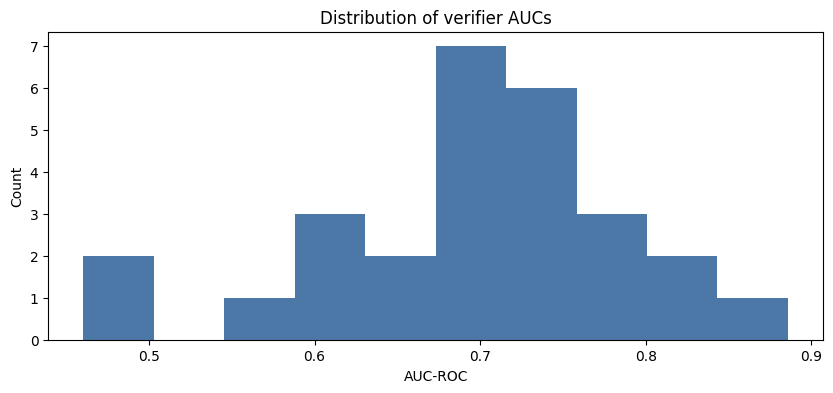

In [7]:
# Visualize individual verifier AUCs
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.hist([u for u in individual_utilities if not np.isnan(u)], bins=10, color="#4C78A8")
plt.xlabel("AUC-ROC")
plt.ylabel("Count")
plt.title("Distribution of verifier AUCs")
plt.show()

In [8]:
# Reliability metrics per verifier: AUC and best-threshold accuracy
from sklearn.metrics import roc_auc_score, accuracy_score

num_verifiers = len(verifier_names)
auc_per_verifier = np.zeros(num_verifiers)
acc_per_verifier = np.zeros(num_verifiers)
best_thresholds = np.zeros(num_verifiers)
mean_scores = np.zeros(num_verifiers)
std_scores = np.zeros(num_verifiers)

for i in range(num_verifiers):
    scores = scores_matrix[:, i]
    mean_scores[i] = float(np.mean(scores))
    std_scores[i] = float(np.std(scores))
    # AUC (robust if scores are continuous)
    try:
        auc_per_verifier[i] = roc_auc_score(ground_truth, scores)
    except Exception:
        auc_per_verifier[i] = np.nan
    # Best threshold accuracy (optimize on this dev split)
    # Use percentiles to avoid O(N) thresholds
    percentiles = np.linspace(1, 99, 99)
    candidate_thresholds = np.percentile(scores, percentiles)
    best_acc = -1.0
    best_t = 0.0
    for t in candidate_thresholds:
        preds = (scores >= t)
        acc = accuracy_score(ground_truth, preds)
        if acc > best_acc:
            best_acc = acc
            best_t = float(t)
    acc_per_verifier[i] = best_acc
    best_thresholds[i] = best_t

verifier_metrics = pd.DataFrame({
    "verifier": verifier_names,
    "auc": auc_per_verifier,
    "best_acc": acc_per_verifier,
    "best_threshold": best_thresholds,
    "mean_score": mean_scores,
    "std_score": std_scores,
}).sort_values(by=["auc", "best_acc"], ascending=False).reset_index(drop=True)

verifier_metrics.head(10)

,verifier,auc,best_acc,best_threshold,mean_score,std_score
0,Qwen72B,0.885928,0.8720,0.283133,0.682676,0.299325
1,QwenPRM_min,0.840827,0.8310,0.039533,0.668454,0.372493
2,QwenPRM_avg,0.836018,0.8292,0.153656,0.751528,0.307537
3,InternLM2Reward7B,0.786488,0.8074,0.015911,0.404480,0.323197
4,EurusPRMStage2_avg,0.782756,0.7992,0.000000,0.840840,0.276775
5,EurusPRMStage2_min,0.779663,0.7992,0.000000,0.830045,0.289688
6,Skyworks,0.750994,0.8108,0.004622,0.544781,0.322676
7,QwenPRM_max,0.744856,0.8140,0.008241,0.909973,0.263148
8,QRM,0.735284,0.7992,0.000000,0.705767,0.332258
9,EurusPRMStage2_max,0.734498,0.8082,0.011247,0.395697,0.282108


In [9]:
# Pairwise similarity between verifiers: Pearson, Cosine, Co-agreement
from numpy.linalg import norm

# Pearson correlation on raw scores
with np.errstate(invalid='ignore'):
    pearson_sim = np.corrcoef(scores_matrix, rowvar=False)

# Cosine similarity on raw scores (column-wise normalization)
X = scores_matrix.astype(float)
col_norms = np.maximum(norm(X, axis=0, keepdims=True), 1e-12)
Xn = X / col_norms
cosine_sim = Xn.T @ Xn

# Co-agreement on binarized predictions at each verifier's best threshold
bin_preds = np.zeros_like(scores_matrix, dtype=bool)
for i in range(num_verifiers):
    bin_preds[:, i] = scores_matrix[:, i] >= best_thresholds[i]
co_agree = (bin_preds[:, :, None] == bin_preds[:, None, :]).mean(axis=0)

similarities = {
    "pearson": pearson_sim,
    "cosine": cosine_sim,
    "co_agreement": co_agree,
}

# Quick sanity check
{key: mat.shape for key, mat in similarities.items()}

{'pearson': (27, 27), 'cosine': (27, 27), 'co_agreement': (27, 27)}

In [19]:
# Greedy selection: prefer high utility and low similarity to selected set
from typing import List, Tuple

def greedy_select(
    utilities: np.ndarray,
    similarity_matrix: np.ndarray,
    k: int | None = None,
    alpha: float = 1.0,
    beta: float = 1.0,
    agg: str = "max",  # how to aggregate similarity to the set: "max" or "mean"
    start_index: int | None = None,
) -> dict:
    n = len(utilities)
    k = n if k is None else min(k, n)
    selected: List[int] = []
    remaining: set[int] = set(range(n))

    # start with best utility if not provided
    if start_index is None:
        start_index = int(np.nanargmax(utilities))
    selected.append(start_index)
    remaining.remove(start_index)

    step_scores: List[float] = [float(alpha * utilities[start_index])]

    while len(selected) < k and remaining:
        best_idx = None
        best_score = -1e18
        for j in list(remaining):
            if agg == "max":
                sim_to_set = np.nanmax(similarity_matrix[j, selected])
            else:
                sim_to_set = float(np.nanmean(similarity_matrix[j, selected]))
            score = alpha * float(utilities[j]) - beta * float(sim_to_set)
            if score > best_score:
                best_score = score
                best_idx = j
        selected.append(best_idx)
        remaining.remove(best_idx)
        step_scores.append(float(best_score))

    return {
        "order": selected,
        "step_scores": step_scores,
        "verifiers": [verifier_names[i] for i in selected],
    }

# Choose utility = AUC (fallback to accuracy if AUC NaN)
utility_vec = np.where(np.isnan(auc_per_verifier), acc_per_verifier, auc_per_verifier)

# Example runs
result_pearson = greedy_select(utility_vec, similarities["pearson"], k=min(10, num_verifiers), alpha=1.0, beta=0.5, agg="max")
result_coagree = greedy_select(utility_vec, similarities["co_agreement"], k=min(10, num_verifiers), alpha=1.0, beta=0.5, agg="max")

result_pearson #, result_coagree


{'order': [20, 4, 19, 10, 16, 11, 17, 22, 1, 8],
 'step_scores': [0.8859280719962992,
  0.7012700934683507,
  0.6680942507050157,
  0.6402218945256624,
  0.6066586574343023,
  0.6060297758730492,
  0.5618466198183298,
  0.5244989299750225,
  0.4433585613683306,
  0.4276001528480716],
 'verifiers': ['Qwen72B',
  'GPM',
  'InternLM2Reward7B',
  'QwenPRM_max',
  'EurusPRMStage2_max',
  'QwenPRM_avg',
  'EurusPRMStage2_avg',
  'LDLRewardGemma',
  'Skyworks',
  'ArmorRM']}

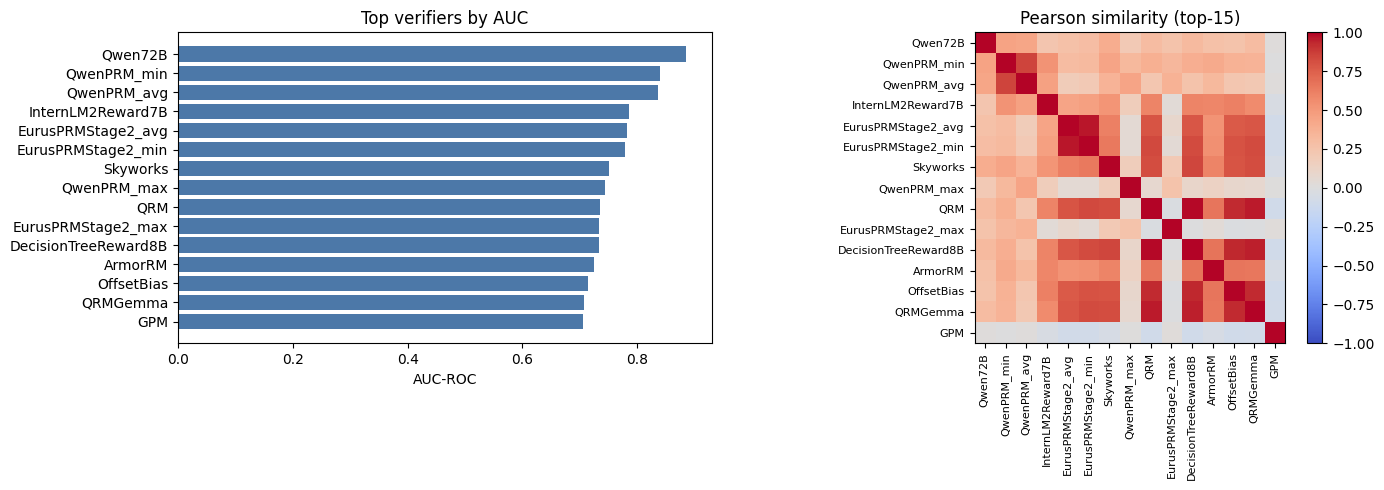

In [20]:
# Visualizations: utilities and similarity heatmap
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of top-15 by AUC
topk = verifier_metrics.head(15)
axes[0].barh(topk["verifier"], topk["auc"], color="#4C78A8")
axes[0].invert_yaxis()
axes[0].set_title("Top verifiers by AUC")
axes[0].set_xlabel("AUC-ROC")

# Heatmap of Pearson similarity for top-15 by AUC
idxs = [verifier_names.index(v) for v in topk["verifier"].tolist()]
subsim = similarities["pearson"][np.ix_(idxs, idxs)]
im = axes[1].imshow(subsim, cmap="coolwarm", vmin=-1, vmax=1)
axes[1].set_title("Pearson similarity (top-15)")
axes[1].set_xticks(range(len(idxs)))
axes[1].set_yticks(range(len(idxs)))
axes[1].set_xticklabels(topk["verifier"], rotation=90, fontsize=8)
axes[1].set_yticklabels(topk["verifier"], fontsize=8)
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


In [21]:
# Driver: tune selection parameters here
alpha = 1.0   # weight for utility (AUC)
beta = 0.7    # penalty for similarity
k_select = min(10, num_verifiers)
agg = "max"   # "max" or "mean"
sim_choice = "pearson"  # "pearson", "cosine", or "co_agreement"

res = greedy_select(utility_vec, similarities[sim_choice], k=k_select, alpha=alpha, beta=beta, agg=agg)

print(f"Similarity: {sim_choice}, alpha={alpha}, beta={beta}, agg={agg}")
for rank, (idx, step_score) in enumerate(zip(res["order"], res["step_scores"])):
    name = verifier_names[idx]
    auc = auc_per_verifier[idx]
    acc = acc_per_verifier[idx]
    print(f"{rank+1:2d}. {name:30s}  AUC={auc:0.3f}  ACC*={acc:0.3f}  score={step_score:0.3f}")

# Note: ACC* is best dev-threshold accuracy; production should re-fit or validate thresholds.

Similarity: pearson, alpha=1.0, beta=0.7, agg=max
 1. Qwen72B                         AUC=0.886  ACC*=0.872  score=0.886
 2. GPM                             AUC=0.706  ACC*=0.799  score=0.699
 3. InternLM2Reward7B               AUC=0.786  ACC*=0.807  score=0.621
 4. QwenPRM_max                     AUC=0.745  ACC*=0.814  score=0.598
 5. EurusPRMStage2_max              AUC=0.734  ACC*=0.808  score=0.556
 6. QwenPRM_avg                     AUC=0.836  ACC*=0.829  score=0.514
 7. LDLRewardGemma                  AUC=0.586  ACC*=0.799  score=0.500
 8. EurusPRMStage2_avg              AUC=0.783  ACC*=0.799  score=0.473
 9. Skyworks                        AUC=0.751  ACC*=0.811  score=0.320
10. ArmorRM                         AUC=0.725  ACC*=0.799  score=0.309


In [22]:
res

{'order': [20, 4, 19, 10, 16, 11, 22, 17, 1, 8],
 'step_scores': [0.8859280719962992,
  0.6992208225513707,
  0.6207369027515355,
  0.5983683499738043,
  0.5555230175202749,
  0.5140344079280383,
  0.4998548077728313,
  0.47348304699901883,
  0.3203044519274914,
  0.30861183899876593],
 'verifiers': ['Qwen72B',
  'GPM',
  'InternLM2Reward7B',
  'QwenPRM_max',
  'EurusPRMStage2_max',
  'QwenPRM_avg',
  'LDLRewardGemma',
  'EurusPRMStage2_avg',
  'Skyworks',
  'ArmorRM']}